### Load the Packages

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
import numpy as np

%matplotlib inline


### Load the Data

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/W207/final_project/data-science-bowl-2019/*.csv

'/content/gdrive/My Drive/Colab Notebooks/W207/final_project/data-science-bowl-2019/sample_submission.csv'
'/content/gdrive/My Drive/Colab Notebooks/W207/final_project/data-science-bowl-2019/specs.csv'
'/content/gdrive/My Drive/Colab Notebooks/W207/final_project/data-science-bowl-2019/test.csv'
'/content/gdrive/My Drive/Colab Notebooks/W207/final_project/data-science-bowl-2019/train.csv'
'/content/gdrive/My Drive/Colab Notebooks/W207/final_project/data-science-bowl-2019/train_labels.csv'


In [0]:
df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/W207/final_project/data-science-bowl-2019/train.csv', header=0, sep=',', quotechar='"')
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/W207/final_project/data-science-bowl-2019/test.csv', header=0, sep=',', quotechar='"')
df_train_label = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/W207/final_project/data-science-bowl-2019/train_labels.csv', header=0, sep=',', quotechar='"')
df_specs = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/W207/final_project/data-science-bowl-2019/specs.csv', header=0, sep=',', quotechar='"')
df_sample_submission = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/W207/final_project/data-science-bowl-2019/sample_submission.csv', header=0, sep=',', quotechar='"')

In [6]:
print("df_train shape: ", df_train.shape)
print("df_test shape: ", df_test.shape)
print("df_train_label shape: ", df_train_label.shape)
print("df_specs shape: ", df_specs.shape)
print("df_sample_submission shape: ", df_sample_submission.shape)

df_train shape:  (11341042, 11)
df_test shape:  (1156414, 11)
df_train_label shape:  (17690, 7)
df_specs shape:  (386, 3)
df_sample_submission shape:  (1000, 2)


### Understanding the train data

#### Sample train data

In [7]:
print("Sample train data (rows: %d, columns: %d)" %(df_train.shape[0], df_train.shape[1]))
df_train.head(15)

Sample train data (rows: 11341042, columns: 11)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK
5,1325467d,0848ef14a8dc6892,2019-09-06T17:55:06.279Z,"{""coordinates"":{""x"":583,""y"":605,""stage_width"":...",0001e90f,4,4070,9991,Sandcastle Builder (Activity),Activity,MAGMAPEAK
6,1325467d,0848ef14a8dc6892,2019-09-06T17:55:06.913Z,"{""coordinates"":{""x"":601,""y"":570,""stage_width"":...",0001e90f,5,4070,10622,Sandcastle Builder (Activity),Activity,MAGMAPEAK
7,1325467d,0848ef14a8dc6892,2019-09-06T17:55:07.546Z,"{""coordinates"":{""x"":250,""y"":665,""stage_width"":...",0001e90f,6,4070,11255,Sandcastle Builder (Activity),Activity,MAGMAPEAK
8,1325467d,0848ef14a8dc6892,2019-09-06T17:55:07.979Z,"{""coordinates"":{""x"":279,""y"":629,""stage_width"":...",0001e90f,7,4070,11689,Sandcastle Builder (Activity),Activity,MAGMAPEAK
9,1325467d,0848ef14a8dc6892,2019-09-06T17:55:08.566Z,"{""coordinates"":{""x"":839,""y"":654,""stage_width"":...",0001e90f,8,4070,12272,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [24]:
len(df_train)

11341042

Clean up the train data by dropping the row where the installation_id never take any game

#### Clean up train data

In [4]:
# keep the last entries with installation_id duplicates
#df_train = df_train.drop_duplicates(subset = 'installation_id', keep='last')
keep_id = df_train[df_train.type == "Assessment"][['installation_id']].drop_duplicates(keep='last')
df_train = pd.merge(df_train, keep_id, on="installation_id", how="inner")
len(df_train)

8294138

In [27]:
print("Sample train data after clean up (rows: %d, columns: %d)" %(df_train.shape[0], df_train.shape[1]))
df_train.head(20)

Sample train data after clean up (rows: 8294138, columns: 11)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,34ba1a28d02ba8ba,2019-08-06T04:57:18.904Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,4b57c9a59474a1b9,2019-08-06T04:57:45.301Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,2b9d5af79bcdb79f,2019-08-06T04:58:14.538Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06T04:58:14.615Z,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:16.680Z,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK
5,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:18.474Z,"{""coordinates"":{""x"":863,""y"":237,""stage_width"":...",0006a69f,4,4070,3937,Sandcastle Builder (Activity),Activity,MAGMAPEAK
6,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:19.365Z,"{""coordinates"":{""x"":817,""y"":617,""stage_width"":...",0006a69f,5,4070,4820,Sandcastle Builder (Activity),Activity,MAGMAPEAK
7,1bb5fbdb,2b9d5af79bcdb79f,2019-08-06T04:58:21.490Z,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,6,3110,6954,Sandcastle Builder (Activity),Activity,MAGMAPEAK
8,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:22.732Z,"{""coordinates"":{""x"":809,""y"":180,""stage_width"":...",0006a69f,7,4070,8187,Sandcastle Builder (Activity),Activity,MAGMAPEAK
9,5e812b27,2b9d5af79bcdb79f,2019-08-06T04:58:23.295Z,"{""size"":0,""coordinates"":{""x"":782,""y"":207,""stag...",0006a69f,8,4030,8745,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [28]:
df_train.installation_id.unique()

array(['0006a69f', '0006c192', '00129856', ..., 'ffd2871d', 'ffe3b25d',
       'ffeb0b1b'], dtype=object)

In [36]:
df_train.event_count.unique()

array([   1,    2,    3, ..., 3181, 3180, 3182])

#### Visualization

In [0]:
df_train.type.unique()

array(['Clip', 'Activity', 'Game', 'Assessment'], dtype=object)

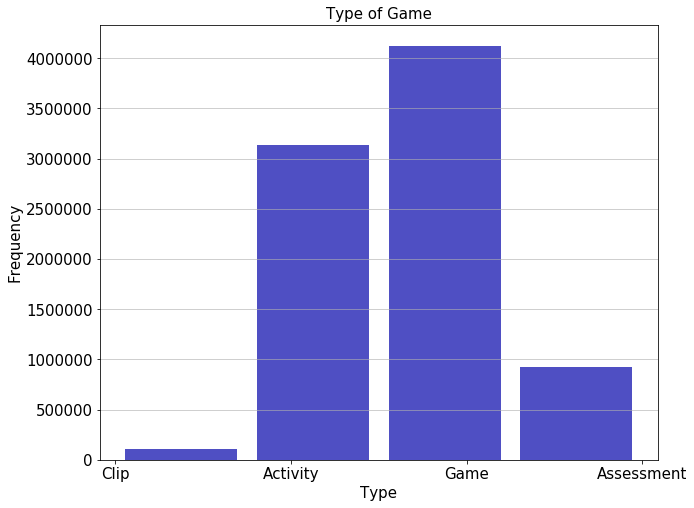

In [0]:
types_data = df_train['type']

plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=types_data, bins=4, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Type',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Type of Game',fontsize=15)
plt.show()

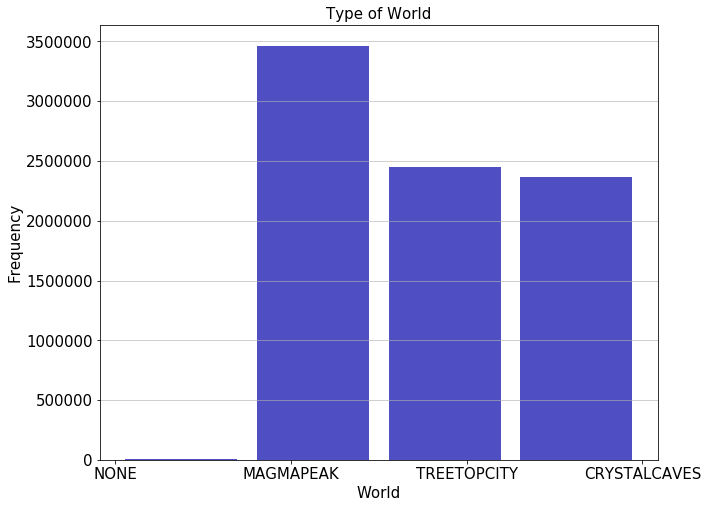

In [0]:
types_data = df_train['world']

plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=types_data, bins=4, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('World',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Type of World',fontsize=15)
plt.show()

In [0]:
title_frequency = df_train['title'].value_counts(sort=True, ascending=False)

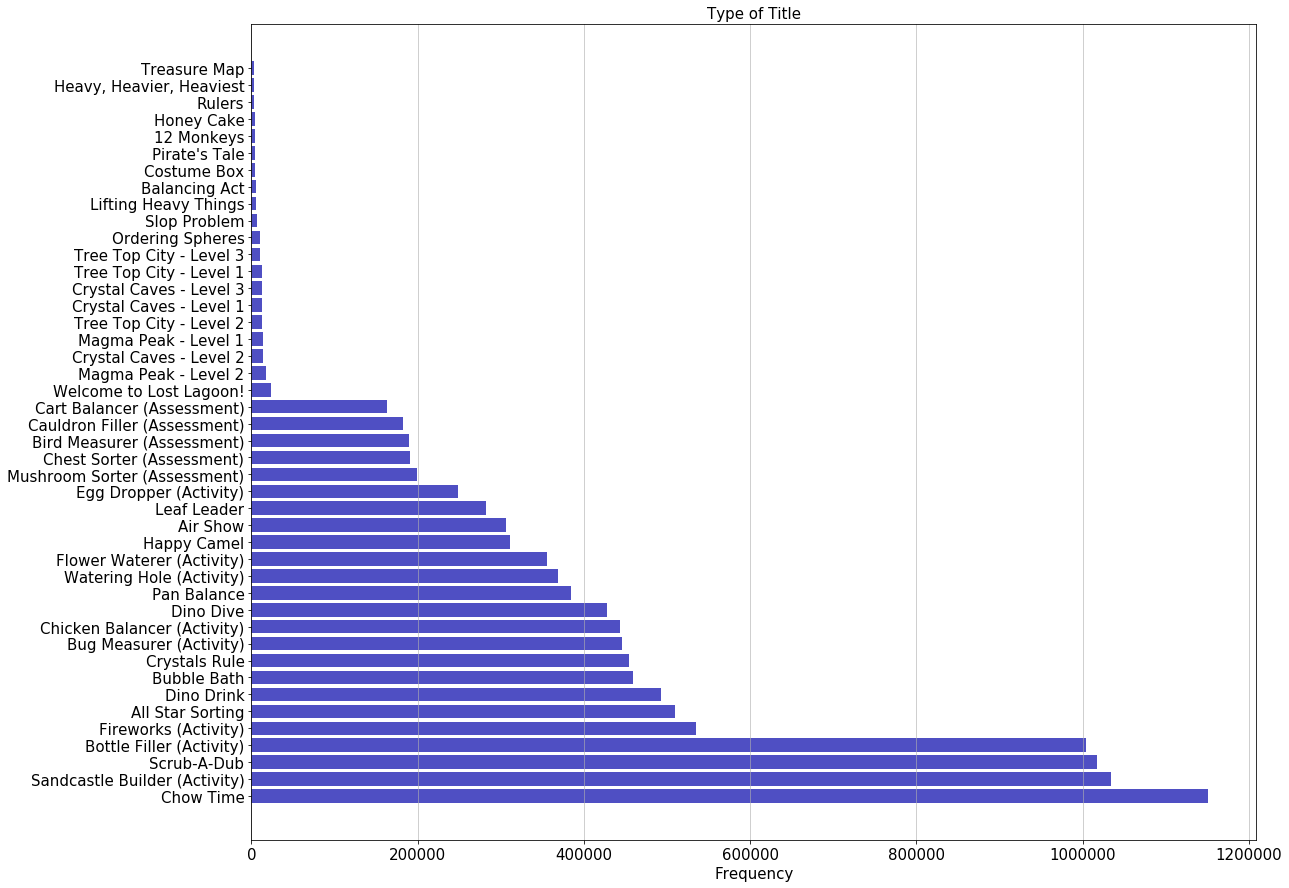

In [0]:
types_data = df_train['title']
plt.figure(figsize=[18,15])

frequencies = title_frequency.values
titles = title_frequency.keys().to_list()
y_pos = np.arange(len(titles))
plt.barh(y_pos, frequencies, color='#0504aa',alpha=0.7)
plt.yticks(y_pos, titles, fontsize=15)
plt.grid(axis='x', alpha=0.75)
plt.xlabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.title('Type of Title',fontsize=15)

plt.show()


### Understand the Test Data

#### Sample test data and clean up test data

In [0]:
keep_id = df_test[df_test.type == "Assessment"][['installation_id']].drop_duplicates()
df_test = pd.merge(df_test, keep_id, on="installation_id", how="inner")
df_test.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


Visualization

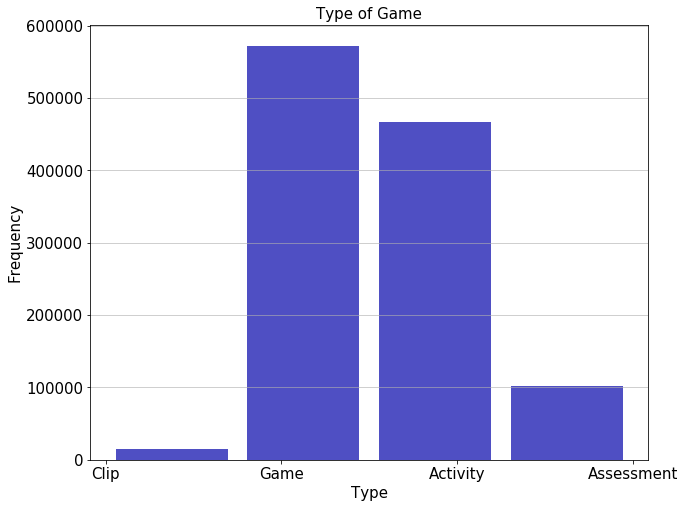

In [0]:
types_data = df_test['type']

plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=types_data, bins=4, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Type',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Type of Game',fontsize=15)
plt.show()

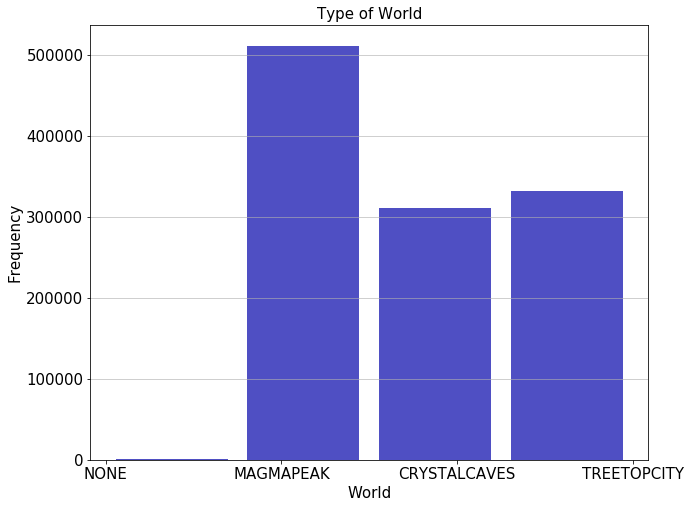

In [0]:
types_data = df_test['world']

plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=types_data, bins=4, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('World',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Type of World',fontsize=15)
plt.show()

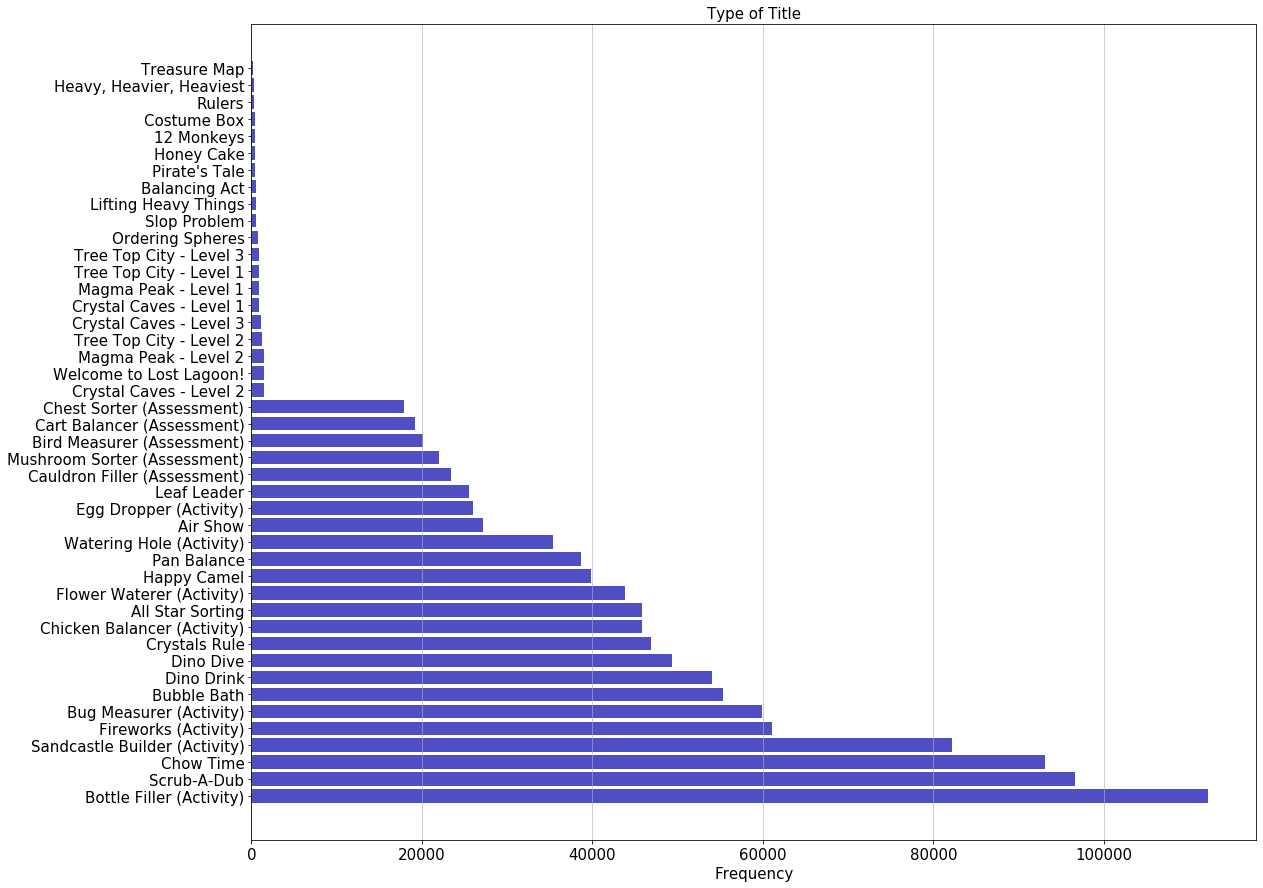

In [0]:
title_frequency = df_test['title'].value_counts(sort=True, ascending=False)
types_data = df_test['title']
plt.figure(figsize=[18,15])

frequencies = title_frequency.values
titles = title_frequency.keys().to_list()
y_pos = np.arange(len(titles))
plt.barh(y_pos, frequencies, color='#0504aa',alpha=0.7)
plt.yticks(y_pos, titles, fontsize=15)
plt.grid(axis='x', alpha=0.75)
plt.xlabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.title('Type of Title',fontsize=15)

plt.show()

### Understanding the Train Label data

#### Sample train label data

In [0]:
df_train_label.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [0]:
len(df_train_label)

17690

#### Visualization

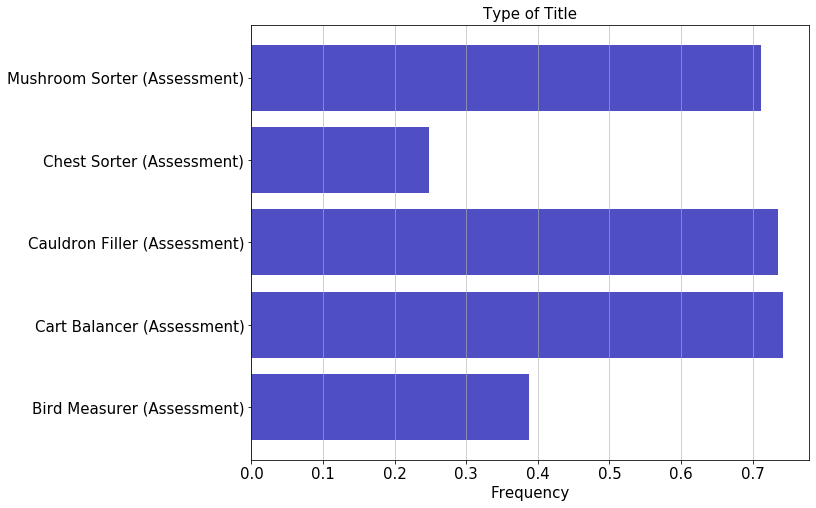

In [0]:
df_avg_accuracy = df_train_label.groupby('title').mean()
df_avg_accuracy.sort_values(by=['accuracy'])

avg_accuracy_data = df_avg_accuracy['accuracy']
plt.figure(figsize=[10,8])

titles = df_avg_accuracy.index
y_pos = np.arange(len(titles))
plt.barh(y_pos, avg_accuracy_data, color='#0504aa',alpha=0.7)
plt.yticks(y_pos, titles, fontsize=15)
plt.grid(axis='x', alpha=0.75)
plt.xlabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.title('Type of Title',fontsize=15)

plt.show()

### Preprocessing data for models

#### Get labels for training set

In [6]:
# Select the training set with last game_session entries
train = df_train.drop_duplicates(subset = 'game_session', keep='last')
# Merge train and train_label datasets
train = pd.merge(train, df_train_label, on="game_session", how="inner")
print("The length after merging the training set and labels: ", len(train))

The length after merging the training set and labels:  17690


In [14]:
train.head()

,event_id,game_session,timestamp,event_data,installation_id_x,event_count,event_code,game_time,title_x,type,world,installation_id_y,title_y,num_correct,num_incorrect,accuracy,accuracy_group
0,a5be6304,901acc108f55a5a1,2019-08-06T05:22:41.147Z,"{""session_duration"":39803,""exit_type"":""game_co...",0006a69f,48,2010,39803,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,e37a2b78,77b8ee947eb84b4e,2019-08-06T05:36:51.915Z,"{""description"":""Uh oh. This caterpillar is too...",0006a69f,87,3120,92799,Bird Measurer (Assessment),Assessment,TREETOPCITY,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,a5be6304,6bdf9623adc94d89,2019-08-06T05:38:16.835Z,"{""session_duration"":26827,""exit_type"":""game_co...",0006a69f,35,2010,26827,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,a5be6304,9501794defd84e4d,2019-08-06T20:35:25.648Z,"{""session_duration"":31843,""exit_type"":""game_co...",0006a69f,42,2010,31843,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,3393b68b,a9ef3ecb3d1acc6a,2019-08-06T20:50:35.426Z,"{""session_duration"":36368,""event_count"":32,""ga...",0006a69f,32,2010,36368,Bird Measurer (Assessment),Assessment,TREETOPCITY,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [7]:
# Using numical features to train model
train.iloc[:,5:8]

,event_count,event_code,game_time
0,48,2010,39803
1,87,3120,92799
2,35,2010,26827
3,42,2010,31843
4,32,2010,36368
...,...,...,...
17685,38,2010,43142
17686,40,2010,54533
17687,89,2010,101189
17688,97,4070,126295


### SVM classifier

#### Import libraries

In [0]:
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

#### Train model

In [0]:
# X -> features, y -> label 
random_train = train.sample(n = 1000) 
X = random_train.iloc[:,5:8]
y = random_train["accuracy_group"]

In [25]:
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape (750, 3)
y_train.shape (750,)
X_test.shape: (250, 3)
y_test.shape: (250,)


In [0]:
# SVM model
clf = SVC()
svm_model = clf.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [38]:
# model accuracy for X_test   
accuracy = svm_model.score(X_test, y_test) 
print("SVM classifier's accuracy: ", accuracy)

0.532
SVM classifier's accuracy:  0.532


In [39]:
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print("SVM classifier's confusion_matrix:")
print(cm)

SVM classifier's confusion_matrix:
[[ 6  5  0 64]
 [ 1  2  0 23]
 [ 1  1  0 29]
 [ 9 10  0 99]]


### Decision tree classifier

#### Import libraries


In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

#### Train model

In [0]:
# X -> features, y -> label 
random_train = train.sample(n = 5000) 
X = random_train.iloc[:,5:8]
y = random_train["accuracy_group"]

In [47]:
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape (3750, 3)
y_train.shape (3750,)
X_test.shape: (1250, 3)
y_test.shape: (1250,)


In [0]:
# training a Descision Tree Classifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

In [50]:
# accuracy on X_test 
accuracy = dtree_model.score(X_test, y_test) 
print("Decision tree classifier's accuracy: ", accuracy)

Decision tree classifier's accuracy:  0.716


In [51]:
# creating a confusion matrix 
dtree_predictions = dtree_model.predict(X_test)  
cm = confusion_matrix(y_test, dtree_predictions) 
print("Decision tree classifier's confusion_matrix:")
cm

Decision tree classifier's confusion_matrix:


array([[316,   0,   0,   0],
       [ 31, 127,   0,  15],
       [ 25,  79,   0,  54],
       [ 75,  76,   0, 452]])

### KNN (k-nearest neighbours) classifier 

#### Import libraries

In [0]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

#### Train model

In [0]:
# X -> features, y -> label 
random_train = train.sample(n = 5000) 
X = random_train.iloc[:,5:8]
y = random_train["accuracy_group"]

In [41]:
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape (3750, 3)
y_train.shape (3750,)
X_test.shape: (1250, 3)
y_test.shape: (1250,)


In [0]:
# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 

In [43]:
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print("KNN classifier's accuracy: ", accuracy)

KNN classifier's accuracy:  0.688


In [44]:
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
print("KNN classifier's confusion_matrix:")
cm

KNN classifier's confusion_matrix:


array([[273,  10,   0,  10],
       [ 41,  77,  20,  40],
       [ 23,  29,  22,  85],
       [ 55,  38,  39, 488]])